# Loading Datasets and Visualizations

by [__Michael Granitzer__ (michael.granitzer@uni-passau.de)]( http://www.mendeley.com/profiles/michael-granitzer/)
and [Konstantin Ziegler (konstantin.ziegler@uni-passau.de)](http://zieglerk.net)
with examples taken from the [scikit-learn documentation](http://scikit-learn.org/stable/)

__License__

This work is licensed under a [Creative Commons Attribution 3.0 Unported License](http://creativecommons.org/licenses/by/3.0/) (CC BY 3.0)

## Example: Fisher's Iris Data

For introducing the different supervised learners we will use the IRIS data set.

The iris data set characterises iris-flowers into three sub-groups according to length and width of the outer (petal) and inner (sepal) leaves of a flower.

**Sepal vs. Petal**


<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Petal-sepal.jpg/220px-Petal-sepal.jpg"/>

**The three classes (setosa, versicolor, virginica)**

<div class ="img-responsive" style="display:inline" >
<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/220px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" width="30%"/>
<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/220px-Iris_versicolor_3.jpg" width="30%"/>
<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/220px-Iris_virginica.jpg" width="30%"  height="10%" style="overflow:hidden"/>
</div>


Image Credits: Wikimedia, [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/deed.en)

In [17]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
print ("Classes:", np.unique(iris.target))
print (iris["DESCR"])

Classes: [0 1 2]
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribut

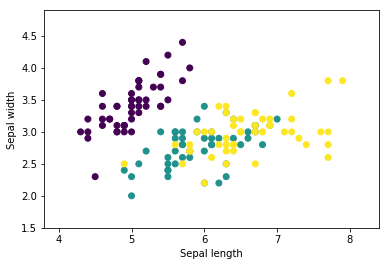

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

X = iris.data
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure()    # initialize new figure
plt.clf()       # clear canvas

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()

In [19]:
# means ...
X.mean(0)    # over samples (axis 0, i.e. rows), not features (axis 1, i.e. columns)

array([ 5.84333333,  3.054     ,  3.75866667,  1.19866667])

In [20]:
# ... and standard deviation
X.std(0)

array([ 0.82530129,  0.43214658,  1.75852918,  0.76061262])

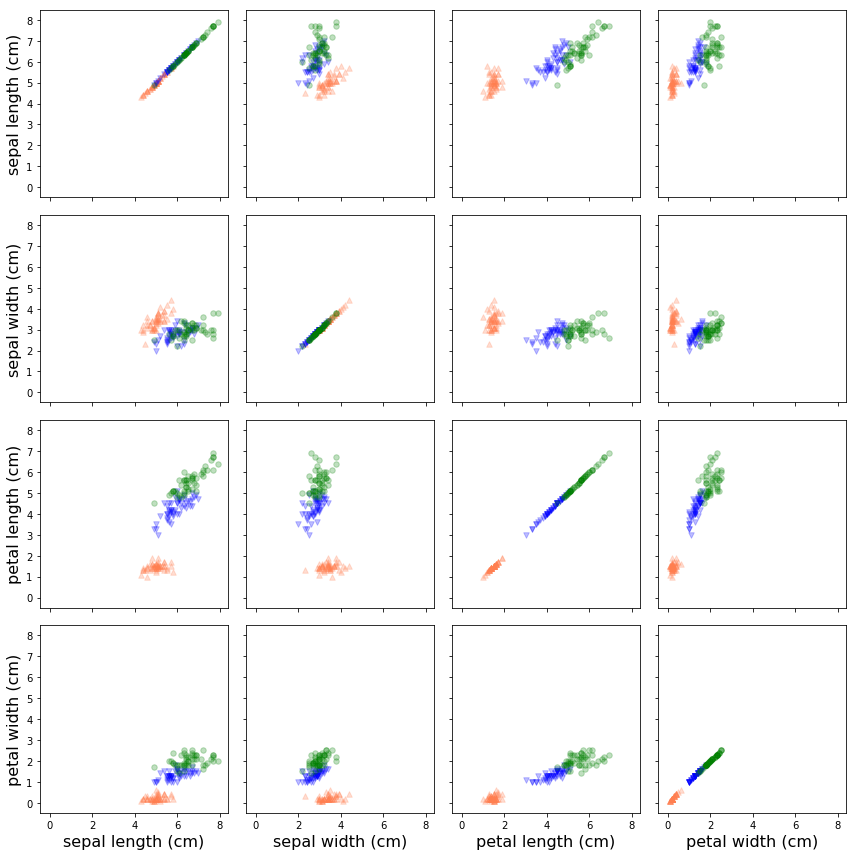

In [25]:
# Let's have a look at all (pairwise) correlations

N = X.shape[1]
n_clusters = 3

fig, axes = plt.subplots(N, N, figsize=(12, 12), sharex=True, sharey=True)

colors = ["coral", "blue", "green"]
markers = ["^", "v", "o"]
for m in range(N):
    for n in range(N):
        for p in range(n_clusters):
            mask = Y == p
            axes[n, m].scatter(X[:, m][mask], X[:, n][mask],
                               marker=markers[p], s=30, 
                               color=colors[p], alpha=0.25)
  
    axes[N-1, m].set_xlabel(iris.feature_names[m], fontsize=16)
    axes[m, 0].set_ylabel(iris.feature_names[m], fontsize=16)
fig.tight_layout()

Let's do similar, using pandas scatter_matrix. It is obvious that plotting a feature against itself results in a straight line, hence we plot the density on the diagonal. Exchange 'kde' with 'hist' to get a histogram instead.

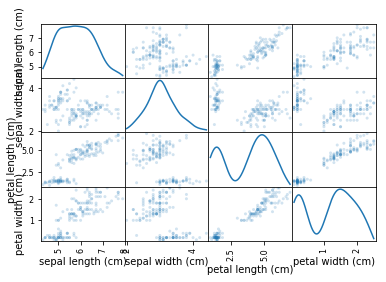

In [26]:
import pandas as pd
from pandas.plotting import scatter_matrix
df = pd.DataFrame(iris.data, columns=iris.feature_names)
plt = scatter_matrix(df, alpha=0.2,  diagonal='kde')